In [ ]:
%matplotlib notebook
import mpl_toolkits.mplot3d.axes3d as p3
import numpy as np

In [ ]:
def pde_wave_exp(a,xf,T,Fx,M,N):
    """
    solve a u_xx = u_t for 0<=x<=xf, 0<=t<=T by explicit method
    u(x,0) = it0(x)
    u_t(x,0) = i1t0(x)
    u(0,t) = bx0(t)
    u(xf,t) = bxf(t)
    M : the number of subintervals along x axis
    N : the number of subintervals along t axis
    Fx : the list of function, Fx = [it0,i1t0,bx0,bxf]
     
    For example:
    Fx = [lambda x:x*(1-x), lambda x: 0.0*x, lambda t: 0.0*t, lambda t: 0.0*t]
    u, x, t = pde_wave_exp(1.0,1.0,2,Fx,20,50)
    Notice that r = a*dt^2/dx^2 must <=1  for stablility
    """
 
    dx, dt = float(xf)/M, float(T)/N
    x = np.linspace(0,xf,M+1)
    t = np.linspace(0,T,N+1)
     
    if len(Fx)!=4:
        print("Fx = [it0,i1t0,bx0,bxf]")
        return
    it0, i1t0, bx0, bxf = Fx[0], Fx[1], Fx[2],Fx[3]
 
    u = np.zeros([N+1,M+1])
    X = np.zeros([N+1,M+1]) #the mesh grids of x
    Y = np.zeros([N+1,M+1]) #the mesh grids of t
 
    for i in range(N+1):
        for j in range(M+1):
            X[i,j] = x[j]
            Y[i,j] = t[i]
             
    #set the boundary condition
    u[0,:] = it0(x)
    u[:,0] = bx0(t)
    u[:,-1] = bxf(t)
 
    r = a*dt*dt/(dx**2)
    r1 = r/2
    r2 = 2*(1-r)
 
    #set the u(x,t_{1})
    u[1,1:-1] = r1*u[0,0:-2]+(1-r)*u[0,1:-1]+r1*u[0,2:]+dt*i1t0(x[1:-1])
     
    for k in range(2,N+1):
        u[k,1:-1] = r*u[k-1,0:-2]+r2*u[k-1,1:-1]+r*u[k-1,2:]-u[k-2,1:-1]
         
    return u, X, Y

In [ ]:
Fx = [lambda x:x*(1-x), lambda x: 0.0*x, lambda t: 0.0*t, lambda t: 0.0*t]
u,x,t = pde_wave_exp(1.0,1.0,2,Fx,20,50)

In [ ]:
u.shape

(51, 21)

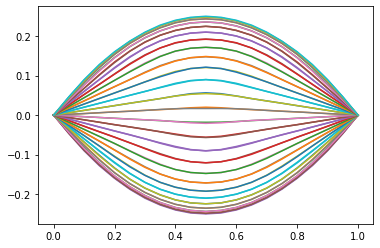

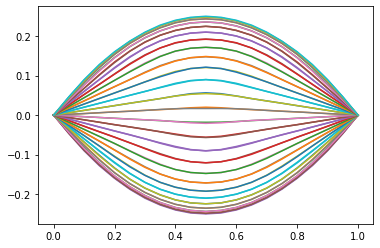

In [ ]:
%matplotlib inline
import time
from IPython import display
import pylab as plt
for i in range(1,51):
    plt.plot(x[i,:],u[i,:])
    display.clear_output(wait=True)
    display.display(plt.gcf()) 
    time.sleep(1.0)